In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
nba = pd.read_csv("final.csv")
nba

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,182.88,74.842680,31.1,3.8,4.6,2000-01,SG,42.0,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.12,98.883056,29.8,3.9,5.1,2000-01,SG,40.2,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,215.90,142.881480,28.7,12.7,3.7,2000-01,C,39.5,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,200.66,95.254320,28.5,5.9,5.0,2000-01,SG,40.9,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.12,102.058200,27.6,5.5,3.9,2000-01,SF,39.7,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,Mark Hendrickson,26,205.74,99.790240,0.9,0.9,0.4,1999-00,PF,4.7,...,0.750,10.4,0.666,10.2,12.2,23.5,7.8,0.1,0.0,-0.6
12057,Eric Montross,28,213.36,122.469840,0.8,1.4,0.1,1999-00,C,6.5,...,0.500,0.2,0.332,12.6,2.9,26.7,10.9,-0.4,-0.6,-9.3
12058,Mark West,39,208.28,104.326160,0.7,1.4,0.1,1999-00,C,5.8,...,0.625,4.3,0.483,13.6,2.1,27.9,7.5,0.2,-0.1,-5.1
12059,Antonio Lang,28,203.20,92.986360,0.6,0.5,0.2,1999-00,SF,3.8,...,0.800,5.7,0.366,7.4,8.0,19.6,11.9,0.0,0.0,-5.5


In [3]:
print(nba.columns)

Index(['normalized_name', 'age', 'player_height', 'player_weight', 'pts',
       'reb', 'ast', 'season', 'Pos.x', 'MP.x', 'Tm.x', 'G.x', 'GS', 'eFG.',
       'X3P', 'X3PA', 'X3P.', 'X3PAr', 'X2P', 'X2PA', 'X2P.', 'FT', 'FTA',
       'FT.', 'PER', 'TS.', 'TRB.', 'AST.', 'TOV.', 'USG.', 'WS', 'VORP',
       'BPM'],
      dtype='object')


In [4]:
nba

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,Allen Iverson,26,182.88,74.842680,31.1,3.8,4.6,2000-01,SG,42.0,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,Jerry Stackhouse,26,198.12,98.883056,29.8,3.9,5.1,2000-01,SG,40.2,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,Shaquille O'Neal,29,215.90,142.881480,28.7,12.7,3.7,2000-01,C,39.5,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,Kobe Bryant,22,200.66,95.254320,28.5,5.9,5.0,2000-01,SG,40.9,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,Vince Carter,24,198.12,102.058200,27.6,5.5,3.9,2000-01,SF,39.7,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,Mark Hendrickson,26,205.74,99.790240,0.9,0.9,0.4,1999-00,PF,4.7,...,0.750,10.4,0.666,10.2,12.2,23.5,7.8,0.1,0.0,-0.6
12057,Eric Montross,28,213.36,122.469840,0.8,1.4,0.1,1999-00,C,6.5,...,0.500,0.2,0.332,12.6,2.9,26.7,10.9,-0.4,-0.6,-9.3
12058,Mark West,39,208.28,104.326160,0.7,1.4,0.1,1999-00,C,5.8,...,0.625,4.3,0.483,13.6,2.1,27.9,7.5,0.2,-0.1,-5.1
12059,Antonio Lang,28,203.20,92.986360,0.6,0.5,0.2,1999-00,SF,3.8,...,0.800,5.7,0.366,7.4,8.0,19.6,11.9,0.0,0.0,-5.5


In [5]:
correlation_matrix = nba.corr()

C:\Users\Nela\AppData\Local\Temp\ipykernel_11652\1213336279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nba.corr()


In [6]:
correlation_with_pts = correlation_matrix['pts'].sort_values(ascending=False)
correlation_with_reb = correlation_matrix['reb'].sort_values(ascending=False)
correlation_with_ast = correlation_matrix['ast'].sort_values(ascending=False)

correlation_with_pts, correlation_with_reb, correlation_with_ast

(pts              1.000000
 X2P              0.909531
 X2PA             0.905631
 FT               0.896393
 MP.x             0.885625
 FTA              0.876971
 WS               0.763555
 VORP             0.744721
 PER              0.739771
 GS               0.732228
 USG.             0.709042
 BPM              0.674923
 ast              0.653752
 reb              0.601482
 X3PA             0.575873
 X3P              0.569515
 G.x              0.497463
 TS.              0.401242
 AST.             0.400644
 FT.              0.346903
 eFG.             0.303011
 X3P.             0.271866
 X2P.             0.231280
 X3PAr            0.031260
 age             -0.001176
 player_weight   -0.032116
 TRB.            -0.034999
 player_height   -0.063192
 TOV.            -0.268723
 Name: pts, dtype: float64,
 reb              1.000000
 X2P              0.724368
 X2PA             0.678532
 MP.x             0.664879
 WS               0.656378
 TRB.             0.634406
 FTA              0.631755


In [7]:
features_pts_extended = correlation_with_pts.index[1:20].tolist() 
features_reb_extended = correlation_with_reb.index[1:20].tolist()
features_ast_extended = correlation_with_ast.index[1:19].tolist()
features_ast_extended.append(correlation_with_ast.idxmin())

In [8]:
y_pts = nba['pts']
y_reb = nba['reb']
y_ast = nba['ast']

X_pts_extended = nba[features_pts_extended]
X_reb_extended = nba[features_reb_extended]
X_ast_extended = nba[features_ast_extended]

X_train_pts_ext, X_test_pts_ext, y_train_pts_ext, y_test_pts_ext = train_test_split(X_pts_extended, y_pts, test_size=0.2, random_state=0)
X_train_reb_ext, X_test_reb_ext, y_train_reb_ext, y_test_reb_ext = train_test_split(X_reb_extended, y_reb, test_size=0.2, random_state=0)
X_train_ast_ext, X_test_ast_ext, y_train_ast_ext, y_test_ast_ext = train_test_split(X_ast_extended, y_ast, test_size=0.2, random_state=0)

In [9]:
model_pts_ext = LinearRegression()
model_reb_ext = LinearRegression()
model_ast_ext = LinearRegression()

sfs_pts = SFS(model_pts_ext, k_features='best', forward=True, floating=False, scoring='r2', cv=5)
sfs_pts = sfs_pts.fit(X_train_pts_ext, y_train_pts_ext)

sfs_reb = SFS(model_reb_ext, k_features='best', forward=True, floating=False, scoring='r2', cv=5)
sfs_reb = sfs_reb.fit(X_train_reb_ext, y_train_reb_ext)

sfs_ast = SFS(model_ast_ext, k_features='best', forward=True, floating=False, scoring='r2', cv=5)
sfs_ast = sfs_ast.fit(X_train_ast_ext, y_train_ast_ext)

In [10]:
print("Selected features for points model:", X_train_pts_ext.columns[list(sfs_pts.k_feature_idx_)])
print("R² score for points model:", sfs_pts.k_score_)

print("Selected features for rebounds model:", X_train_reb_ext.columns[list(sfs_reb.k_feature_idx_)])
print("R² score for rebounds model:", sfs_reb.k_score_)

print("Selected features for assists model:", X_train_ast_ext.columns[list(sfs_ast.k_feature_idx_)])
print("R² score for assists model:", sfs_ast.k_score_)

Selected features for points model: Index(['X2P', 'X2PA', 'FT', 'FTA', 'WS', 'ast', 'X3PA', 'X3P', 'G.x', 'TS.'], dtype='object')
R² score for points model: 0.9997106900476191
Selected features for rebounds model: Index(['X2P', 'X2PA', 'MP.x', 'WS', 'TRB.', 'FTA', 'PER', 'GS', 'pts', 'FT',
       'VORP', 'BPM', 'player_weight', 'G.x', 'X2P.', 'TS.', 'eFG.', 'USG.'],
      dtype='object')
R² score for rebounds model: 0.9184928176285881
Selected features for assists model: Index(['AST.', 'MP.x', 'pts', 'VORP', 'FT', 'X2PA', 'GS', 'FTA', 'BPM', 'WS',
       'X3PA', 'PER', 'USG.', 'G.x', 'X3P.', 'FT.', 'player_height'],
      dtype='object')
R² score for assists model: 0.9286788850656971


In [11]:
features_position = nba.drop(columns=["Pos.x", 'normalized_name', 'season', "Tm.x"])  # Removing non-numeric and target columns
target_position = nba["Pos.x"]

In [12]:
label_encoder = LabelEncoder()
target_position_encoded = label_encoder.fit_transform(target_position)

In [13]:
features_position

,age,player_height,player_weight,pts,reb,ast,MP.x,G.x,GS,eFG.,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
0,26,182.88,74.842680,31.1,3.8,4.6,42.0,71,71,0.447,...,0.814,24.0,0.518,5.2,23.0,10.0,35.9,11.8,6.1,6.1
1,26,198.12,98.883056,29.8,3.9,5.1,40.2,80,80,0.445,...,0.822,21.8,0.521,5.2,25.8,12.5,35.2,9.2,5.8,5.1
2,29,215.90,142.881480,28.7,12.7,3.7,39.5,74,74,0.572,...,0.513,30.2,0.574,18.1,18.8,10.5,31.6,14.9,7.1,7.7
3,22,200.66,95.254320,28.5,5.9,5.0,40.9,68,68,0.484,...,0.853,24.5,0.552,8.1,23.0,11.1,31.8,11.3,4.7,4.8
4,24,198.12,102.058200,27.6,5.5,3.9,39.7,75,75,0.509,...,0.765,25.0,0.551,7.9,19.2,8.2,30.7,12.9,7.2,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,26,205.74,99.790240,0.9,0.9,0.4,4.7,15,0,0.625,...,0.750,10.4,0.666,10.2,12.2,23.5,7.8,0.1,0.0,-0.6
12057,28,213.36,122.469840,0.8,1.4,0.1,6.5,51,0,0.309,...,0.500,0.2,0.332,12.6,2.9,26.7,10.9,-0.4,-0.6,-9.3
12058,39,208.28,104.326160,0.7,1.4,0.1,5.8,22,2,0.417,...,0.625,4.3,0.483,13.6,2.1,27.9,7.5,0.2,-0.1,-5.1
12059,28,203.20,92.986360,0.6,0.5,0.2,3.8,10,0,0.167,...,0.800,5.7,0.366,7.4,8.0,19.6,11.9,0.0,0.0,-5.5


In [14]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(features_position, target_position_encoded, test_size=0.2, random_state=0)

model_position = DecisionTreeClassifier(random_state=0)

model_position.fit(X_train_pos, y_train_pos)

y_pred_pos = model_position.predict(X_test_pos)

accuracy_pos = accuracy_score(y_test_pos, y_pred_pos)
classification_report_pos = classification_report(y_test_pos, y_pred_pos, target_names=label_encoder.classes_)

print(accuracy_pos)
print(classification_report_pos)

0.6767509324492333
              precision    recall  f1-score   support

           C       0.76      0.75      0.76       480
          PF       0.58      0.58      0.58       486
          PG       0.83      0.82      0.82       470
          SF       0.56      0.57      0.56       454
          SG       0.66      0.67      0.66       523

    accuracy                           0.68      2413
   macro avg       0.68      0.68      0.68      2413
weighted avg       0.68      0.68      0.68      2413



In [15]:
specified_features_updated = ['player_height', 'player_weight', 'TRB.', 'AST.', 'FT.', 'X3PAr', 'X3PA', 'TOV.', 'pts', 'X2P.', 'TS.']

X_pos_specified_updated = nba[specified_features_updated]

X_train_pos_spec_updated, X_test_pos_spec_updated, y_train_pos_spec_updated, y_test_pos_spec_updated = train_test_split(X_pos_specified_updated, target_position_encoded, test_size=0.2, random_state=0)

model_position_spec_updated = DecisionTreeClassifier(random_state=0)

model_position_spec_updated.fit(X_train_pos_spec_updated, y_train_pos_spec_updated)

y_pred_pos_spec_updated = model_position_spec_updated.predict(X_test_pos_spec_updated)

accuracy_pos_spec_updated = accuracy_score(y_test_pos_spec_updated, y_pred_pos_spec_updated)
classification_report_pos_spec_updated = classification_report(y_test_pos_spec_updated, y_pred_pos_spec_updated, target_names=label_encoder.classes_)

print(accuracy_pos_spec_updated)
print(classification_report_pos_spec_updated)

0.6833816825528388
              precision    recall  f1-score   support

           C       0.74      0.77      0.75       480
          PF       0.59      0.58      0.59       486
          PG       0.83      0.82      0.83       470
          SF       0.57      0.57      0.57       454
          SG       0.68      0.67      0.68       523

    accuracy                           0.68      2413
   macro avg       0.68      0.68      0.68      2413
weighted avg       0.68      0.68      0.68      2413



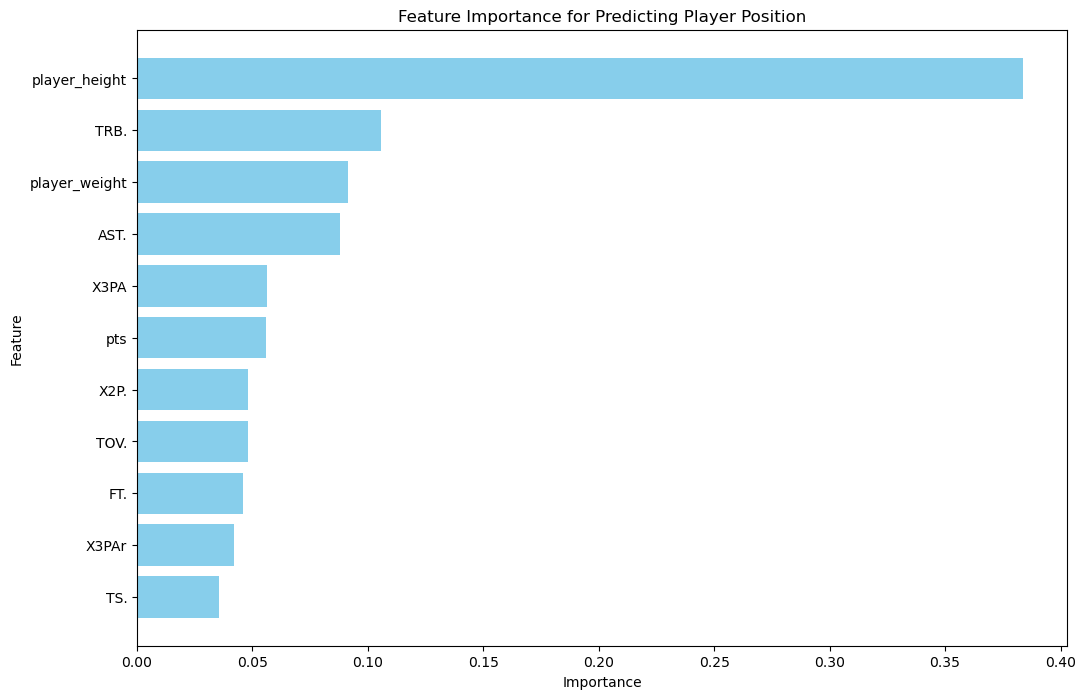

,Feature,Importance
0,player_height,0.383621
2,TRB.,0.105571
1,player_weight,0.091383
3,AST.,0.087955
6,X3PA,0.056298
8,pts,0.055982
9,X2P.,0.048156
7,TOV.,0.048000
4,FT.,0.045794
5,X3PAr,0.041891


In [16]:
feature_importances = model_position_spec_updated.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': specified_features_updated,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Player Position')
plt.gca().invert_yaxis()  
plt.show()

feature_importances_df


In [17]:
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12],
    'min_samples_split': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_position_spec_updated, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_pos_spec_updated, y_train_pos_spec_updated)

best_params = grid_search.best_params_
best_grid_model = grid_search.best_estimator_

y_pred_pos_spec_updated_grid = best_grid_model.predict(X_test_pos_spec_updated)

accuracy_pos_spec_updated_grid = accuracy_score(y_test_pos_spec_updated, y_pred_pos_spec_updated_grid)
classification_report_pos_spec_updated_grid = classification_report(y_test_pos_spec_updated, y_pred_pos_spec_updated_grid, target_names=label_encoder.classes_)

print("Best Parameters:", best_params)
print(accuracy_pos_spec_updated_grid)
print(classification_report_pos_spec_updated_grid)


Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.7186075424782429
              precision    recall  f1-score   support

           C       0.80      0.80      0.80       480
          PF       0.62      0.67      0.64       486
          PG       0.84      0.87      0.85       470
          SF       0.61      0.57      0.59       454
          SG       0.71      0.68      0.70       523

    accuracy                           0.72      2413
   macro avg       0.72      0.72      0.72      2413
weighted avg       0.72      0.72      0.72      2413



In [18]:
cross_val_scores = cross_val_score(best_grid_model, X_pos_specified_updated, target_position_encoded, cv=10, scoring='accuracy')

In [19]:
average_cross_val_score = cross_val_scores.mean()
std_cross_val_score = cross_val_scores.std()

In [20]:
print(average_cross_val_score)
print(std_cross_val_score)

0.720915307472579
0.04856776732923824


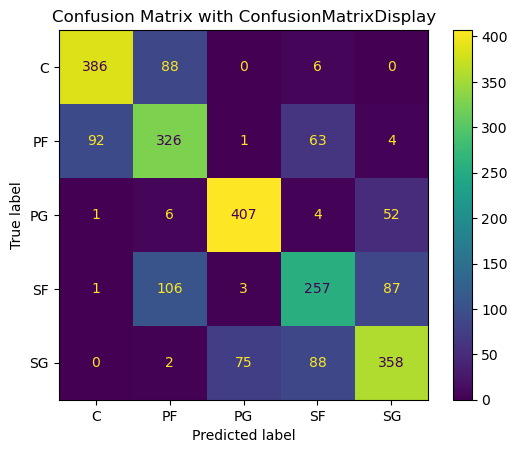

In [21]:
confusion_mat = ConfusionMatrixDisplay.from_estimator(
    best_grid_model, 
    X_test_pos_spec_updated, 
    y_test_pos_spec_updated, 
    display_labels=label_encoder.classes_)

plt.title('Confusion Matrix with ConfusionMatrixDisplay')
plt.show()

In [22]:
wrong_indices = (y_test_pos_spec_updated == label_encoder.transform(['PG'])[0]) & (y_pred_pos_spec_updated_grid == label_encoder.transform(['PF'])[0])

wrong_samples = X_test_pos_spec_updated[wrong_indices].sort_values(by="pts", ascending=False)

wrong_samples

,player_height,player_weight,TRB.,AST.,FT.,X3PAr,X3PA,TOV.,pts,X2P.,TS.
9919,200.66,104.32616,13.8,42.3,0.742,0.373,8.2,11.9,32.4,0.588,0.609
8411,200.66,104.32616,14.7,45.7,0.758,0.431,8.9,14.8,28.8,0.574,0.585
9404,200.66,104.32616,14.3,46.0,0.744,0.406,8.8,15.3,28.4,0.528,0.571
7973,208.28,104.32616,13.7,34.2,0.600,0.006,0.1,19.3,16.9,0.566,0.582
8474,208.28,108.86208,12.2,33.8,0.621,0.011,0.1,20.4,16.4,0.583,0.602
10191,208.28,108.86208,13.4,31.3,0.439,0.009,0.0,27.2,6.9,0.571,0.559


In [23]:
wrong_samples_with_player_info = nba.loc[wrong_samples.index]

In [24]:
wrong_samples_with_player_info

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
9919,Luka Doncic,24,200.66,104.32616,32.4,8.6,8.0,2022-23,PG,36.2,...,0.742,28.7,0.609,13.8,42.3,11.9,37.6,10.2,6.6,8.9
8411,Luka Doncic,21,200.66,104.32616,28.8,9.4,8.8,2019-20,PG,33.6,...,0.758,27.6,0.585,14.7,45.7,14.8,36.8,8.8,5.4,8.4
9404,Luka Doncic,23,200.66,104.32616,28.4,9.1,8.7,2021-22,PG,35.4,...,0.744,25.1,0.571,14.3,46.0,15.3,37.4,7.6,5.9,8.2
7973,Ben Simmons,22,208.28,104.32616,16.9,8.8,7.7,2018-19,PG,34.2,...,0.600,20.0,0.582,13.7,34.2,19.3,22.1,8.2,3.8,3.6
8474,Ben Simmons,23,208.28,108.86208,16.4,7.8,8.0,2019-20,PG,35.4,...,0.621,20.4,0.602,12.2,33.8,20.4,20.9,6.9,2.8,3.6
10191,Ben Simmons,26,208.28,108.86208,6.9,6.3,6.1,2022-23,PG,26.3,...,0.439,13.4,0.559,13.4,31.3,27.2,14.3,2.2,0.7,0.4


In [25]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_pos, y_train_pos)


RandomForestClassifier(random_state=42)

In [26]:
y_pred_rf_class = rf_class.predict(X_test_pos)
accuracy_rf = accuracy_score(y_test_pos, y_pred_rf_class)
classification_rep_rf = classification_report(y_test_pos, y_pred_rf_class, target_names=label_encoder.classes_)

print(accuracy_rf)
print(classification_rep_rf)

0.7637795275590551
              precision    recall  f1-score   support

           C       0.83      0.83      0.83       480
          PF       0.70      0.69      0.69       486
          PG       0.89      0.89      0.89       470
          SF       0.65      0.67      0.66       454
          SG       0.75      0.74      0.75       523

    accuracy                           0.76      2413
   macro avg       0.76      0.76      0.76      2413
weighted avg       0.76      0.76      0.76      2413



<Figure size 1000x800 with 0 Axes>

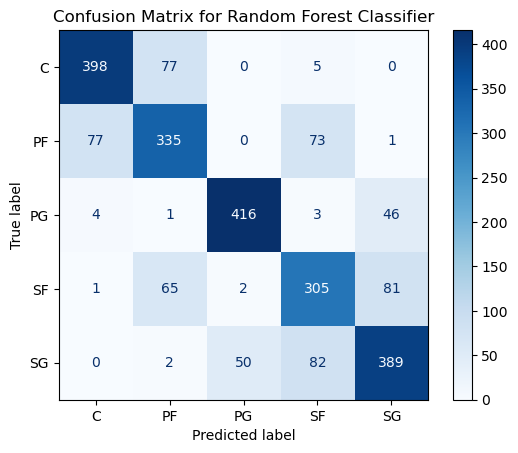

In [27]:
cm = confusion_matrix(y_test_pos, y_pred_rf_class, labels=rf_class.classes_)

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [28]:
wrong_indices = (y_test_pos == label_encoder.transform(['PG'])[0]) & (y_pred_rf_class == label_encoder.transform(['PF'])[0])

wrong_samples = X_test_pos[wrong_indices].sort_values(by="pts", ascending=False)

wrong_samples

,age,player_height,player_weight,pts,reb,ast,MP.x,G.x,GS,eFG.,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
9919,24,200.66,104.32616,32.4,8.6,8.0,36.2,66,66,0.56,...,0.742,28.7,0.609,13.8,42.3,11.9,37.6,10.2,6.6,8.9


In [29]:
wrong_samples_with_player_info = nba.loc[wrong_samples.index]
wrong_samples_with_player_info

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
9919,Luka Doncic,24,200.66,104.32616,32.4,8.6,8.0,2022-23,PG,36.2,...,0.742,28.7,0.609,13.8,42.3,11.9,37.6,10.2,6.6,8.9


In [30]:
wrong_indices = (y_test_pos == label_encoder.transform(['PG'])[0]) & (y_pred_rf_class == label_encoder.transform(['C'])[0])

wrong_samples = X_test_pos[wrong_indices].sort_values(by="pts", ascending=False)

wrong_samples

,age,player_height,player_weight,pts,reb,ast,MP.x,G.x,GS,eFG.,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
7973,22,208.28,104.32616,16.9,8.8,7.7,34.2,79,79,0.563,...,0.600,20.0,0.582,13.7,34.2,19.3,22.1,8.2,3.8,3.6
8474,23,208.28,108.86208,16.4,7.8,8.0,35.4,57,57,0.581,...,0.621,20.4,0.602,12.2,33.8,20.4,20.9,6.9,2.8,3.6
8986,24,210.82,108.86208,14.3,7.2,6.9,32.4,58,58,0.560,...,0.613,18.3,0.584,12.2,31.3,19.6,20.2,6.0,2.3,2.9
10191,26,208.28,108.86208,6.9,6.3,6.1,26.3,42,33,0.566,...,0.439,13.4,0.559,13.4,31.3,27.2,14.3,2.2,0.7,0.4


In [31]:
wrong_samples_with_player_info = nba.loc[wrong_samples.index]
wrong_samples_with_player_info

,normalized_name,age,player_height,player_weight,pts,reb,ast,season,Pos.x,MP.x,...,FT.,PER,TS.,TRB.,AST.,TOV.,USG.,WS,VORP,BPM
7973,Ben Simmons,22,208.28,104.32616,16.9,8.8,7.7,2018-19,PG,34.2,...,0.600,20.0,0.582,13.7,34.2,19.3,22.1,8.2,3.8,3.6
8474,Ben Simmons,23,208.28,108.86208,16.4,7.8,8.0,2019-20,PG,35.4,...,0.621,20.4,0.602,12.2,33.8,20.4,20.9,6.9,2.8,3.6
8986,Ben Simmons,24,210.82,108.86208,14.3,7.2,6.9,2020-21,PG,32.4,...,0.613,18.3,0.584,12.2,31.3,19.6,20.2,6.0,2.3,2.9
10191,Ben Simmons,26,208.28,108.86208,6.9,6.3,6.1,2022-23,PG,26.3,...,0.439,13.4,0.559,13.4,31.3,27.2,14.3,2.2,0.7,0.4


In [32]:
clustering_features = ['pts', 'reb', 'ast', 'player_height', 'player_weight', 'MP.x', 'GS', 'X2P', 'PER', 'USG.', 'X3PA', 'WS', 'VORP', 'BPM', 'X2PA', 'FTA', 'age', 'TOV.', 'eFG.']
X_clustering = nba[clustering_features]

In [33]:
scaler = StandardScaler()
X_clustering_normalized = scaler.fit_transform(X_clustering)

In [34]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 35):  # Checking for up to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_clustering_normalized)
    inertia.append(kmeans.inertia_)

C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_k

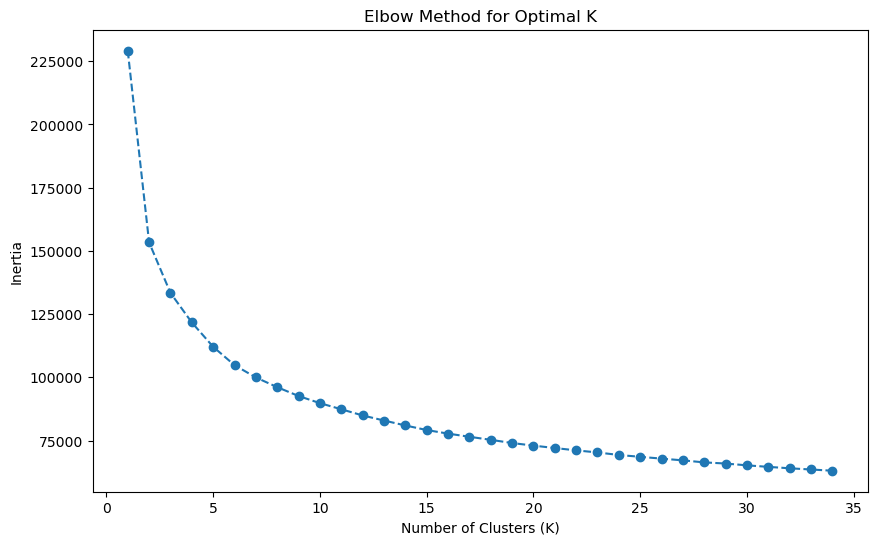

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 35), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(X_clustering_normalized)

C:\Users\Nela\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
clustered_data = nba.copy()
clustered_data['cluster'] = clusters

In [38]:
cluster_characteristics = clustered_data.groupby('cluster')[clustering_features].mean()
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

In [39]:
cluster_characteristics, cluster_sizes

(               pts       reb       ast  player_height  player_weight  \
 cluster                                                                
 0         8.702008  3.492637  1.534137     200.303427      98.516052   
 1         3.914655  1.571648  0.820019     196.438582      92.890161   
 2        26.245789  8.535263  5.061053     204.496737     107.675579   
 3        13.053333  3.532708  6.237292     188.325125      86.215554   
 4         1.729295  1.179295  0.469824     200.911762      99.400590   
 5         7.129964  2.745303  1.216647     199.123115      97.682789   
 6        12.436021  6.571870  1.543739     207.456569     111.090360   
 7        18.603608  9.479897  2.646907     209.222680     114.176588   
 8         7.771114  2.117136  3.103182     187.468788      84.760078   
 9        10.901089  8.533333  1.644880     209.812854     111.192298   
 10        2.060779  2.427013  0.420000     208.807792     111.789810   
 11       19.605169  5.404573  3.548907     201.033

In [40]:
nba['cluster'] = clusters

cluster_0_players = nba[nba['cluster'] == 0]

print(cluster_0_players[['normalized_name', 'pts', 'reb', 'ast']])

       normalized_name   pts  reb  ast
89         Chris Mills  12.0  6.2  1.2
99         Jim Jackson  11.5  4.0  2.9
108      Johnny Newman  10.9  2.1  1.4
115    Austin Croshere  10.1  4.8  1.1
118     Corey Maggette  10.0  4.2  1.2
...                ...   ...  ...  ...
11808      Pat Garrity   8.2  2.6  0.7
11824   Corey Benjamin   7.7  1.8  1.1
11841   Roshown McLeod   7.2  3.1  1.2
11844    Eric Williams   7.2  2.3  1.4
11857   Adrian Griffin   6.7  5.2  2.5

[747 rows x 4 columns]


In [41]:
cluster_1_players = nba[nba['cluster'] == 1]

print(cluster_1_players[['normalized_name', 'pts', 'reb', 'ast']])

         normalized_name  pts  reb  ast
222          A.J. Guyton  6.0  1.1  1.9
223       Trajan Langdon  6.0  1.4  1.2
228        Keyon Dooling  5.9  1.2  2.3
242        Hedo Turkoglu  5.3  2.8  0.9
245        Rodney Buford  5.3  1.6  0.4
...                  ...  ...  ...  ...
11991         Steve Kerr  2.8  0.6  0.4
11993        Bruce Bowen  2.8  1.4  0.5
12004         Ryan Bowen  2.5  2.2  0.4
12037        Kevin Ollie  1.8  0.8  1.2
12054  Eldridge Recasner  1.0  0.6  0.7

[1044 rows x 4 columns]


In [42]:
cluster_5_players = nba[nba['cluster'] == 5]

print(cluster_5_players[['normalized_name', 'pts', 'reb', 'ast']])

      normalized_name  pts  reb  ast
156     Walt Williams  8.3  3.4  1.3
168      Hubert Davis  7.9  2.1  1.7
169      Sean Elliott  7.9  3.3  1.6
191     Wesley Person  7.1  3.0  1.5
192         Dee Brown  6.9  1.6  1.7
...               ...  ...  ...  ...
11877   Jaren Jackson  6.3  2.2  1.5
11885   Scott Burrell  6.1  3.5  1.0
11901    Dennis Scott  5.6  1.6  1.0
11902    Bryant Stith  5.6  1.9  1.4
11921    Chris Mullin  5.1  1.6  0.8

[841 rows x 4 columns]
